### Standard imports 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.linear_model import LogisticRegression

In [2]:
data = np.loadtxt('n3115_fake_stars_i.csv',delimiter=',')

In [60]:
in_mags = data[0,:]
out_mags = data[1,:]
recovered = (out_mags - in_mags) < 40
diff = out_mags - in_mags

In [61]:
recovery_cor = np.median(diff[diff < 50])

In [62]:
in_mags_cor = in_mags + recovery_cor

In [63]:
diff_cor = out_mags - in_mags_cor

In [64]:
diff_cor

array([ -7.83264780e-03,  -2.42777120e-01,  -1.47118290e-03, ...,
         7.61781035e+01,   7.45360218e+01,   7.63849577e+01])

In [65]:
diff = out_mags - in_mags

(13, 30)

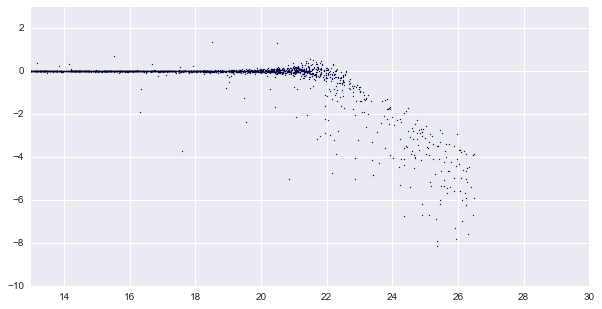

In [68]:
fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(in_mags_cor,diff_cor,s=1.)
ax.set_ylim(-10,3)
ax.set_xlim(13,30)

In [53]:
lr = LogisticRegression()

In [54]:
in_mags.shape

(5000,)

In [55]:
lr.fit(in_mags_cor.reshape(5000,1),recovered.astype(int))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
foo = np.arange(13,30,0.01)

In [57]:
curve_2 = lr.predict_proba(foo.reshape(foo.shape[0],1))[:,1]

(13, 30)

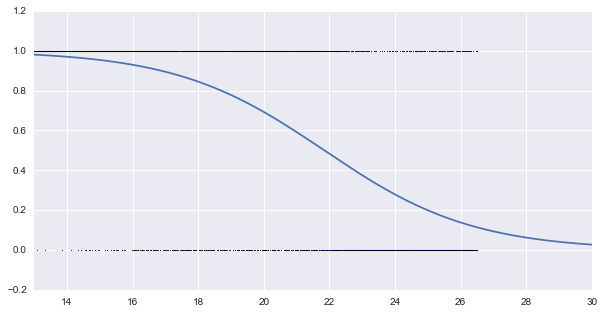

In [58]:
fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(in_mags_cor,recovered.astype(int),s=0.5)
#ax.plot(foo,curve)
ax.plot(foo,curve_2)
ax.set_xlim(13,30)
